### 주성분분석 Principal Component Analysis
* 자료의 요약이나 <span style=color:green>**'선형관계식'**</span>을 통해 <span style=color:green>**'차원수'**</span>를 감소시켜 데이터해석을 용이하게 하는데 있음
* 서로 상관이 없거나 독립적인 새로운 변수들을 이용해서 정보손실을 최소화하도록 함

* 둘 이상의 양적변수등 사이에서 분산/공분산 관계를 이용하여<br>
변수들의 선형결합으로 나타나는 주성분을 찾고 <br>
이 중 중요한 n개의 주성분으로 전체변동의 대부분을 설명하고자 하는 다변량 분석법
* 예를 들어, 8x8크기의 손글씨 데이터 경우
    + 총 64개의 특성으로 구성되어 있는데 글씨가 쓰여진 영역만 따로 골라서 분석에 활용한다면 64개의 특성이 모두 다 필요한 것은 아님


* 차원축소 방법 - 투영/사영projection
    + 먼저, 데이터에 임의의 초평면을 정의한 다음
    + 데이터들을 이 평면에 투영함
    + 그런 다음, 데이터의 분산이 최대로 보존되는지 확인
* PCA를 이용해 고차원의 데이터를<br>
정보손실없이 변환함으로써 시각화가 편리해지고<br>
데이터의 크기가 감소함으로써 빠른 학습이 가능해짐
* PCA 분석을 위해 공분산/고유벡터/고유값에 대한 개념 필요 - 선형대수

### 주성분 분석 순서
* 먼저 데이터를 표준화/정규화한 후
* 각 변수간 공분산을 구하고
* 공분산을 이용해서 고유값/고유벡터를 구함
* 분산이 큰 고유벡터를 찾아 데이터를 이것에 투영해서
* 그 결과값들을 분석이나 시각화에 사용

<img src='img/pca.gif'>

In [1]:
# iris 데이터셋을 이용해서 주성분 분석 실시
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# 데이터 적재
iris = load_iris()
data = iris.data
target = iris.target

In [3]:
# 전처리
data = StandardScaler().fit_transform(data)

### 공분산 계산
* 각 독립변수(특성)별 상관관계 파악
* 그러기 위해서는 특성들을 전치행렬로 변환해야 함
* 전치행렬은 객체명.T로 간단히 만들수 있음

In [4]:
cov_matrix = np.cov(data.T)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### 공분산의 고유값/고유벡터 계산
* numpy에서 linalg.eig 함수 제공

In [5]:
eigval, eigvec = np.linalg.eig(cov_matrix)
eigval, eigvec

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [6]:
# 데이터의 차원을 1차원으로 변환했을때 73%

eigval/sum(eigval)

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

### 고유값을 이용해서 적절한 주성분 갯수 선택
* 스크리scree 그래프 이용

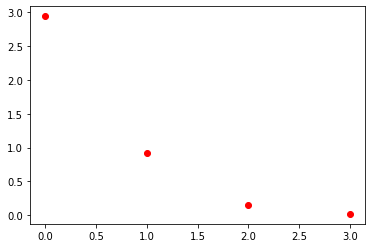

In [7]:
plt.plot(eigval, 'ro')

In [8]:
# 투영한 결과를 데이터프레임에 생성
# 즉, 4차원데이터를 고유벡터로 투영함
# A벡터를 B벡터에 투영했을때 투영된 벡터의 길이를 구하는 공식
# => x.y / || y ||
# x,y => np.dot(x,y)
# || y || => np.linalg.norm(y)

In [9]:
projX1 = data.dot(eigvec.T[0]) / np.linalg.norm(eigvec.T[0])
result = pd.DataFrame(projX1, columns=['PC1'])

projX2 = data.dot(eigvec.T[1]) / np.linalg.norm(eigvec.T[1])
result['PC2'] = projX2

result['target'] = target

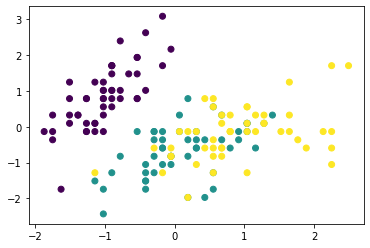

In [10]:
# 기존 변수로 시각화
plt.scatter(data[:, 0], data[:, 1], c=target) # sepal

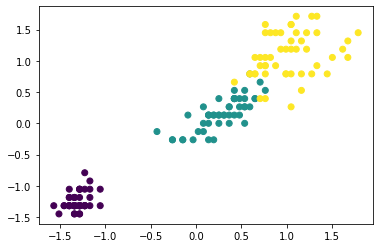

In [11]:
plt.scatter(data[:,2], data[:, 3], c=target) # tapal

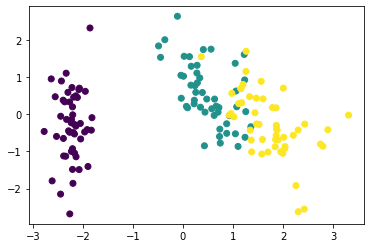

In [12]:
# 주성분 분석 후 시각화
plt.scatter(result.PC1, result.PC2, c=target) 

In [13]:
# sklearn으로 PCA 분석
# n_components : 차원축소할 차원수 지정
pca = PCA(n_components=2)
pcaXY = pca.fit_transform(data)
result = pd.DataFrame(pcaXY, columns=['PC1','PC2'])
result['target'] = target

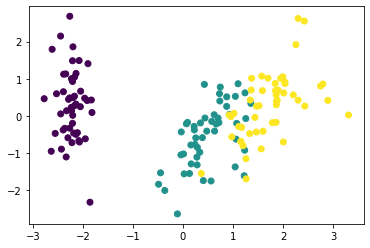

In [14]:
plt.scatter(result.PC1, result.PC2, c=result.target)

### 고유값/고유벡터 찾아보기
* Ax = λx 
* 선형변환 A = [[3,1], [1,3]]을 만족하는 고유벡터와 고유값은?

* 고유벡터x와 고유값λ 간단계산
* http://www.arndt-bruenner.de/mathe/scripts/engl_eigenwert2.htm


In [15]:
A = [[3,1],[1,3]] # 선형변환
x1 = [-1,1]
x2 = [1,1]

x3 = np.dot(A, x1) # 행렬 곱연산, 선형변환 적용
x4 = np.dot(A, x2)

origin = [0], [0] # 벡터공간 원점 정의

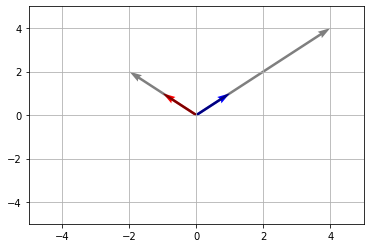

In [16]:
# 변환전 벡터
# quiver 함수 : 그래프에 화살표 벡터를 표시
# quiver(원점, x좌표, y좌표, 색상, 각도, 단위)
plt.quiver(*origin, x1[0], x1[1], color='r', angles= 'xy', scale_units='xy', scale=1)

plt.quiver(*origin, x2[0], x2[1], color='b', angles= 'xy', scale_units='xy', scale=1)

# 변환후 벡터
plt.quiver(*origin, x3[0], x3[1],color='k', alpha=0.5, angles= 'xy', scale_units='xy', scale=1)

plt.quiver(*origin, x4[0], x4[1],color='k', alpha=0.5, angles= 'xy', scale_units='xy', scale=1)

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid(True)

In [17]:
# numpy함수로 고유값/고유벡터 알아내기
np.set_printoptions(formatter={'float_kind':'{:.0f}'.format}, suppress=True)

# numpy함수로 고유값 알아내기
A = np.array([[3,1],[1,3]])
eigval, eigvec = np.linalg.eig(A)
eigval, eigvec

(array([4, 2]),
 array([[1, -1],
        [1, 1]]))

### 89구역 54개의 공원잔디 식물종 분석
* 1~54컬럼만 추출해서 주성분분석 실시
* plot : 실험조건
* species : 식물종
* hay : 건초량
* pH : 토양산성도

In [18]:
pg = pd.read_csv('pgfull.txt', sep='\t')
pg.head()

,AC,AE,AM,AO,AP,AR,AS,AU,BH,BM,...,TO,TP,TR,VC,VK,plot,lime,species,hay,pH
0,2.51,1.18,0.45,0.91,0.47,0.00,0.0,0.00,0.0,0.06,...,0.10,0.04,0.00,0.00,0.0,1.0,1,33,5.105,7.0
1,6.85,0.10,0.58,1.02,0.35,0.00,0.0,0.00,0.0,0.36,...,0.14,0.00,0.00,0.00,0.0,1.0,2,31,6.455,6.2
2,10.58,0.11,0.21,1.85,0.00,0.00,0.0,0.00,0.0,0.00,...,0.02,0.06,0.00,0.00,0.0,1.0,3,33,4.870,5.3
3,13.65,0.00,0.00,6.46,0.00,0.00,0.0,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.0,1.0,4,10,2.160,4.0
4,4.84,0.00,1.49,0.36,0.10,0.06,0.0,0.02,0.0,0.90,...,0.08,0.68,0.48,0.01,0.0,2.1,1,42,4.620,7.0


In [19]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 59 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AC       89 non-null     float64
 1   AE       89 non-null     float64
 2   AM       89 non-null     float64
 3   AO       89 non-null     float64
 4   AP       89 non-null     float64
 5   AR       89 non-null     float64
 6   AS       89 non-null     float64
 7   AU       89 non-null     float64
 8   BH       89 non-null     float64
 9   BM       89 non-null     float64
 10  CC       89 non-null     float64
 11  CF       89 non-null     float64
 12  CM       89 non-null     float64
 13  CN       89 non-null     float64
 14  CX       89 non-null     float64
 15  CY       89 non-null     float64
 16  DC       89 non-null     float64
 17  DG       89 non-null     float64
 18  ER       89 non-null     float64
 19  FM       89 non-null     float64
 20  FP       89 non-null     float64
 21  FR       89 non-nu

In [20]:
# 식물종 갯수 확인
pg.species.value_counts()

27    7
34    7
28    6
29    5
30    4
22    4
32    4
33    4
37    4
36    3
26    3
23    3
4     3
10    3
42    3
14    3
31    2
19    2
25    2
21    2
18    2
15    2
24    2
13    2
44    1
17    1
3     1
16    1
39    1
5     1
6     1
Name: species, dtype: int64

In [32]:
# 주성분분석 데이터 추출
data = pg.iloc[:, :54]
# data = StandardScaler().fit_transform(data)
# 표준화시킨후 주성분분석시 설명력이 떨어져서 여기서는 표준화과정을 생략함

In [27]:
# 주성분분석
pca = PCA()
pcaXY = pca.fit_transform(data)

In [37]:
np.set_printoptions(suppress=True, formatter={'float_kind':'{:.3f}'.format})
# 주성분벡터를 투영한 뒤의 분산 비율 출력
pca.explained_variance_ratio_

array([0.394, 0.242, 0.109, 0.081, 0.071, 0.035, 0.014, 0.011, 0.009,
       0.008, 0.005, 0.004, 0.004, 0.002, 0.002, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
       0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
       0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
       0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000])

In [38]:
np.sum(pca.explained_variance_ratio_[:3]) # 74% 설명력 가짐

0.7448981110837313

### 지도학습 데이터를 대상으로 차원축소를 하고 싶은 경우
* 선형판별 분석 LDA